# Imports

In [372]:
!pip install tensorflow deepcut
!pip install pythainlp
!pip install gspread --upgrade

In [373]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gspread
from wordcloud import WordCloud
from matplotlib import rcParams
from nltk.corpus import stopwords
from pythainlp.corpus import thai_stopwords
from pythainlp.util import normalize
from pythainlp.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
rcParams['font.family'] = 'tahoma'

In [374]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [375]:
gc = gspread.service_account("service_account.json")
sh = gc.open("Big Data Final Project (Youtube)").sheet1

In [376]:
df = pd.DataFrame(sh.get_all_records())
df

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,t3ED8-Wb1qA,เอาชีวิตรอด 100 วัน HARDCORE Minecraft จาก ห้ว...,2022-04-23T11:16:18Z,UCAeHTcJX2zRPRTCGrFKgamg,Aekk,20,22.24.04,Minecraft|มายคราฟ|เอาชีวิตรอด 100วัน|Minecraft...,390307,0,0,2040,https://i.ytimg.com/vi/t3ED8-Wb1qA/default.jpg,FALSE,TRUE,ทุกคนที่เข้าร่วมสามารถได้รับ 172 เพชร(หรือเงิน...
1,cdt7WfRVXVk,F.HERO x VannDa Ft. 1MILL & SPRITE - RUN THE T...,2022-04-22T12:00:25Z,UCRHhB1EVy0kfISY6_IOauxg,High Cloud Entertainment,10,22.24.04,น้ำหอมดิออร์มันอยู่ที่คอ|รันเดอะทาว|F.HERO|Spr...,1915653,0,0,9925,https://i.ytimg.com/vi/cdt7WfRVXVk/default.jpg,FALSE,TRUE,WE ARE READY TO #RUNTHETOWN !🎧 https://bfan.li...
2,kGzvNcNxC7k,ซอยชื่อแปลก หลงทั้งพิธีกร แขกรับเชิญ ยันทีมงาน...,2022-04-22T12:00:34Z,UC8XqGKvkVgmL_MCs4irRKqw,GoodDayOfficial,22,22.24.04,kodey|แม่เราชัดๆ|วัยรุ่น|contrast|ความแตกต่าง|...,739679,0,0,874,https://i.ytimg.com/vi/kGzvNcNxC7k/default.jpg,FALSE,TRUE,https://www.facebook.com/Gooddayofficial-22080...
3,UCynSrE2PWc,🔴LIVE ศึกคัดเลือกตัวแทนไทย AIC 2022 Pro Qualif...,2022-04-23T10:50:48Z,UCy19QXxbCHh8qVVCbuGk-ig,Garena RoV Thailand,20,22.24.04,[none],781650,0,0,213,https://i.ytimg.com/vi/UCynSrE2PWc/default.jpg,FALSE,TRUE,🔴LIVE วันนี้พบศึกชิงตั๋วทีมที่ 2 ไป AIC 2022AI...
4,K22MZ4wODok,ได้อยู่ - โอ๊ต ปราโมทย์ feat. MILLI [Official MV],2022-04-22T10:00:12Z,UClaWcr2EHnESxeANYikBkvQ,KHOTKOOL MUSIC,10,22.24.04,ได้อยู่|แก่น|โอ๊ตปราโมทย์|OatPramote|MILLI|KHO...,877580,0,0,986,https://i.ytimg.com/vi/K22MZ4wODok/default.jpg,FALSE,TRUE,Produced by Janpat MontrelerdrasmeLyric & Comp...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,eoOWh27-7SE,สุดดราม่า! เงินบริจาค 1.8 ล้านไม่พอ แม่ลูก 3 โ...,2022-04-26T15:53:24Z,UCIoFfVIOrRRbI-WVdDhTTwg,Nation online,25,22.01.05,ข่าวด่วน|ดูคลิป|รายการทีวี|รายการย้อนหลัง|กรุง...,734046,0,0,4055,https://i.ytimg.com/vi/eoOWh27-7SE/default.jpg,False,True,รับชมวีดีโอที่คัดสรรจากเรา https://bit.ly/31bY...
1880,UOCckSALeU4,อย่ามาหลอย -เปรี้ยว แทน บาส【OFFICIAL MV】,2022-04-29T02:09:00Z,UCol982ImShyUvAeo11yrmmQ,ค่ายเพลง ได้หมดถ้าสดชื่น,24,22.01.05,[none],295176,0,0,707,https://i.ytimg.com/vi/UOCckSALeU4/default.jpg,False,True,เพลง - อย่ามาหลอยขับร้อง -เปรี้ยว แทน บาส - ผู...
1881,sbUyBkjMn10,ชุดสืบผี • คุณจ่าบอส | 24 เม.ย. 65 | THE GHOST...,2022-04-25T03:01:09Z,UCM246zZ4qNNmFQ2WHnP_CRA,TheghostradioOfficial,24,22.01.05,รวมเรื่องหลอน|เดอะโกสย้อนหลัง|เดอะโกส|ฟังแห้ง|...,799439,0,0,424,https://i.ytimg.com/vi/sbUyBkjMn10/default.jpg,False,True,เป็นเรื่องที่เกิดขึ้นตอนทำงานอยู่ฝ่ายสืบสวน แล...
1882,Vtfp_TkA9wA,ต่าย สายธาร โดนหลอกทั้งประเทศ ไม่ใช่แค่ หนุ่ม ...,2022-04-28T08:50:00Z,UCYFRASOwvRwe92atwl41Xdg,ข่าวเด่นข่าวเด็ด,24,22.01.05,ข่าวเด่นข่าวเด็ด|ต่าย สายธาร โดนหลอกทั้งประเทศ...,676433,0,0,403,https://i.ytimg.com/vi/Vtfp_TkA9wA/default.jpg,False,True,ต่าย สายธาร โดนหลอกทั้งประเทศ ไม่ใช่แค่ หนุ่ม ...


# Preprocessing

## Category id -> String

In [377]:
cat_id_to_word = {
    1: "Film & Animation",
    2: "Autos & Vehicles",
    10: "Music",
    15: "Pets & Animals",
    17: "Sports",
    19: "Travel & Events",
    20: "Gaming",
    22: "People & Blogs",
    23: "Comedy",
    24: "Entertainment",
    25: "News & Politics",
    26: "Howto & Style",
    27: "Education",
    28: "Science & Technology",
    29: "Nonprofits & Activism",
    30: "Movies",
    31: "Anime/Animation",
    32: "Action/Adventure",
    33: "Classics",
    34: "Comedy",
    35: "Documentary",
    36: "Drama",
    37: "Family",
    38: "Foreign",
    39: "Horror",
    40: "Sci-Fi/Fantasy",
    41: "Thriller",
    42: "Shorts",
    43: "Shows",
    44: "Trailers",
}

In [378]:
df["category"] = df["categoryId"].map(cat_id_to_word)
df["category"]

0                Gaming
1                 Music
2        People & Blogs
3                Gaming
4                 Music
             ...       
1879    News & Politics
1880      Entertainment
1881      Entertainment
1882      Entertainment
1883             Gaming
Name: category, Length: 1884, dtype: object

## Upload days before trending

Date difference between trending date and published date

In [379]:
df["upload_days_before_trending"] = (pd.to_datetime(df["trending_date"], format="%y.%d.%m") - pd.to_datetime(pd.to_datetime(df["publishedAt"], format="%Y-%m-%dT%H:%M:%SZ").dt.date)).dt.days
df

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,category,upload_days_before_trending
0,t3ED8-Wb1qA,เอาชีวิตรอด 100 วัน HARDCORE Minecraft จาก ห้ว...,2022-04-23T11:16:18Z,UCAeHTcJX2zRPRTCGrFKgamg,Aekk,20,22.24.04,Minecraft|มายคราฟ|เอาชีวิตรอด 100วัน|Minecraft...,390307,0,0,2040,https://i.ytimg.com/vi/t3ED8-Wb1qA/default.jpg,FALSE,TRUE,ทุกคนที่เข้าร่วมสามารถได้รับ 172 เพชร(หรือเงิน...,Gaming,1
1,cdt7WfRVXVk,F.HERO x VannDa Ft. 1MILL & SPRITE - RUN THE T...,2022-04-22T12:00:25Z,UCRHhB1EVy0kfISY6_IOauxg,High Cloud Entertainment,10,22.24.04,น้ำหอมดิออร์มันอยู่ที่คอ|รันเดอะทาว|F.HERO|Spr...,1915653,0,0,9925,https://i.ytimg.com/vi/cdt7WfRVXVk/default.jpg,FALSE,TRUE,WE ARE READY TO #RUNTHETOWN !🎧 https://bfan.li...,Music,2
2,kGzvNcNxC7k,ซอยชื่อแปลก หลงทั้งพิธีกร แขกรับเชิญ ยันทีมงาน...,2022-04-22T12:00:34Z,UC8XqGKvkVgmL_MCs4irRKqw,GoodDayOfficial,22,22.24.04,kodey|แม่เราชัดๆ|วัยรุ่น|contrast|ความแตกต่าง|...,739679,0,0,874,https://i.ytimg.com/vi/kGzvNcNxC7k/default.jpg,FALSE,TRUE,https://www.facebook.com/Gooddayofficial-22080...,People & Blogs,2
3,UCynSrE2PWc,🔴LIVE ศึกคัดเลือกตัวแทนไทย AIC 2022 Pro Qualif...,2022-04-23T10:50:48Z,UCy19QXxbCHh8qVVCbuGk-ig,Garena RoV Thailand,20,22.24.04,[none],781650,0,0,213,https://i.ytimg.com/vi/UCynSrE2PWc/default.jpg,FALSE,TRUE,🔴LIVE วันนี้พบศึกชิงตั๋วทีมที่ 2 ไป AIC 2022AI...,Gaming,1
4,K22MZ4wODok,ได้อยู่ - โอ๊ต ปราโมทย์ feat. MILLI [Official MV],2022-04-22T10:00:12Z,UClaWcr2EHnESxeANYikBkvQ,KHOTKOOL MUSIC,10,22.24.04,ได้อยู่|แก่น|โอ๊ตปราโมทย์|OatPramote|MILLI|KHO...,877580,0,0,986,https://i.ytimg.com/vi/K22MZ4wODok/default.jpg,FALSE,TRUE,Produced by Janpat MontrelerdrasmeLyric & Comp...,Music,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,eoOWh27-7SE,สุดดราม่า! เงินบริจาค 1.8 ล้านไม่พอ แม่ลูก 3 โ...,2022-04-26T15:53:24Z,UCIoFfVIOrRRbI-WVdDhTTwg,Nation online,25,22.01.05,ข่าวด่วน|ดูคลิป|รายการทีวี|รายการย้อนหลัง|กรุง...,734046,0,0,4055,https://i.ytimg.com/vi/eoOWh27-7SE/default.jpg,False,True,รับชมวีดีโอที่คัดสรรจากเรา https://bit.ly/31bY...,News & Politics,5
1880,UOCckSALeU4,อย่ามาหลอย -เปรี้ยว แทน บาส【OFFICIAL MV】,2022-04-29T02:09:00Z,UCol982ImShyUvAeo11yrmmQ,ค่ายเพลง ได้หมดถ้าสดชื่น,24,22.01.05,[none],295176,0,0,707,https://i.ytimg.com/vi/UOCckSALeU4/default.jpg,False,True,เพลง - อย่ามาหลอยขับร้อง -เปรี้ยว แทน บาส - ผู...,Entertainment,2
1881,sbUyBkjMn10,ชุดสืบผี • คุณจ่าบอส | 24 เม.ย. 65 | THE GHOST...,2022-04-25T03:01:09Z,UCM246zZ4qNNmFQ2WHnP_CRA,TheghostradioOfficial,24,22.01.05,รวมเรื่องหลอน|เดอะโกสย้อนหลัง|เดอะโกส|ฟังแห้ง|...,799439,0,0,424,https://i.ytimg.com/vi/sbUyBkjMn10/default.jpg,False,True,เป็นเรื่องที่เกิดขึ้นตอนทำงานอยู่ฝ่ายสืบสวน แล...,Entertainment,6
1882,Vtfp_TkA9wA,ต่าย สายธาร โดนหลอกทั้งประเทศ ไม่ใช่แค่ หนุ่ม ...,2022-04-28T08:50:00Z,UCYFRASOwvRwe92atwl41Xdg,ข่าวเด่นข่าวเด็ด,24,22.01.05,ข่าวเด่นข่าวเด็ด|ต่าย สายธาร โดนหลอกทั้งประเทศ...,676433,0,0,403,https://i.ytimg.com/vi/Vtfp_TkA9wA/default.jpg,False,True,ต่าย สายธาร โดนหลอกทั้งประเทศ ไม่ใช่แค่ หนุ่ม ...,Entertainment,3


In [380]:
df["description"] = df["description"].fillna("[]")

## Tags

### Has tags

New column to check whether the video has tags or not
Tags will be "[none]" if there's no tag on the video

In [381]:
df["has_tags"] = df["tags"] != "[none]"

### String -> list dtypes

Convert tags column which is string type to a list of tags

In [382]:
df["tags"] = df["tags"].apply(lambda x: str(x).split("|") if x != "[none]" else [])
df["tags"]

0       [Minecraft, มายคราฟ, เอาชีวิตรอด 100วัน, Minec...
1       [น้ำหอมดิออร์มันอยู่ที่คอ, รันเดอะทาว, F.HERO,...
2       [kodey, แม่เราชัดๆ, วัยรุ่น, contrast, ความแตก...
3                                                      []
4       [ได้อยู่, แก่น, โอ๊ตปราโมทย์, OatPramote, MILL...
                              ...                        
1879    [ข่าวด่วน, ดูคลิป, รายการทีวี, รายการย้อนหลัง,...
1880                                                   []
1881    [รวมเรื่องหลอน, เดอะโกสย้อนหลัง, เดอะโกส, ฟังแ...
1882    [ข่าวเด่นข่าวเด็ด, ต่าย สายธาร โดนหลอกทั้งประเ...
1883    [Maser Gamer, มาเซอเกมเมอร์, จารเจ, พี่เจ, เจm...
Name: tags, Length: 1884, dtype: object

## Convert "comments_disabled" "ratings_disabled" to all uppercase

During data scraping, I made an error when fetching data from Youtube API from editing my scraper code during the daily fetching, making "comments_disabled" and "ratings_disabled" to have TRUE, True, FALSE, and False. So to solve this issue, we have to make all the values to be uppercase so we can have only TRUE and FALSE

In [383]:
df["comments_disabled"] = df["comments_disabled"].str.upper()
df["ratings_disabled"] = df["ratings_disabled"].str.upper()
df

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,category,upload_days_before_trending,has_tags
0,t3ED8-Wb1qA,เอาชีวิตรอด 100 วัน HARDCORE Minecraft จาก ห้ว...,2022-04-23T11:16:18Z,UCAeHTcJX2zRPRTCGrFKgamg,Aekk,20,22.24.04,"[Minecraft, มายคราฟ, เอาชีวิตรอด 100วัน, Minec...",390307,0,0,2040,https://i.ytimg.com/vi/t3ED8-Wb1qA/default.jpg,FALSE,TRUE,ทุกคนที่เข้าร่วมสามารถได้รับ 172 เพชร(หรือเงิน...,Gaming,1,True
1,cdt7WfRVXVk,F.HERO x VannDa Ft. 1MILL & SPRITE - RUN THE T...,2022-04-22T12:00:25Z,UCRHhB1EVy0kfISY6_IOauxg,High Cloud Entertainment,10,22.24.04,"[น้ำหอมดิออร์มันอยู่ที่คอ, รันเดอะทาว, F.HERO,...",1915653,0,0,9925,https://i.ytimg.com/vi/cdt7WfRVXVk/default.jpg,FALSE,TRUE,WE ARE READY TO #RUNTHETOWN !🎧 https://bfan.li...,Music,2,True
2,kGzvNcNxC7k,ซอยชื่อแปลก หลงทั้งพิธีกร แขกรับเชิญ ยันทีมงาน...,2022-04-22T12:00:34Z,UC8XqGKvkVgmL_MCs4irRKqw,GoodDayOfficial,22,22.24.04,"[kodey, แม่เราชัดๆ, วัยรุ่น, contrast, ความแตก...",739679,0,0,874,https://i.ytimg.com/vi/kGzvNcNxC7k/default.jpg,FALSE,TRUE,https://www.facebook.com/Gooddayofficial-22080...,People & Blogs,2,True
3,UCynSrE2PWc,🔴LIVE ศึกคัดเลือกตัวแทนไทย AIC 2022 Pro Qualif...,2022-04-23T10:50:48Z,UCy19QXxbCHh8qVVCbuGk-ig,Garena RoV Thailand,20,22.24.04,[],781650,0,0,213,https://i.ytimg.com/vi/UCynSrE2PWc/default.jpg,FALSE,TRUE,🔴LIVE วันนี้พบศึกชิงตั๋วทีมที่ 2 ไป AIC 2022AI...,Gaming,1,False
4,K22MZ4wODok,ได้อยู่ - โอ๊ต ปราโมทย์ feat. MILLI [Official MV],2022-04-22T10:00:12Z,UClaWcr2EHnESxeANYikBkvQ,KHOTKOOL MUSIC,10,22.24.04,"[ได้อยู่, แก่น, โอ๊ตปราโมทย์, OatPramote, MILL...",877580,0,0,986,https://i.ytimg.com/vi/K22MZ4wODok/default.jpg,FALSE,TRUE,Produced by Janpat MontrelerdrasmeLyric & Comp...,Music,2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,eoOWh27-7SE,สุดดราม่า! เงินบริจาค 1.8 ล้านไม่พอ แม่ลูก 3 โ...,2022-04-26T15:53:24Z,UCIoFfVIOrRRbI-WVdDhTTwg,Nation online,25,22.01.05,"[ข่าวด่วน, ดูคลิป, รายการทีวี, รายการย้อนหลัง,...",734046,0,0,4055,https://i.ytimg.com/vi/eoOWh27-7SE/default.jpg,FALSE,TRUE,รับชมวีดีโอที่คัดสรรจากเรา https://bit.ly/31bY...,News & Politics,5,True
1880,UOCckSALeU4,อย่ามาหลอย -เปรี้ยว แทน บาส【OFFICIAL MV】,2022-04-29T02:09:00Z,UCol982ImShyUvAeo11yrmmQ,ค่ายเพลง ได้หมดถ้าสดชื่น,24,22.01.05,[],295176,0,0,707,https://i.ytimg.com/vi/UOCckSALeU4/default.jpg,FALSE,TRUE,เพลง - อย่ามาหลอยขับร้อง -เปรี้ยว แทน บาส - ผู...,Entertainment,2,False
1881,sbUyBkjMn10,ชุดสืบผี • คุณจ่าบอส | 24 เม.ย. 65 | THE GHOST...,2022-04-25T03:01:09Z,UCM246zZ4qNNmFQ2WHnP_CRA,TheghostradioOfficial,24,22.01.05,"[รวมเรื่องหลอน, เดอะโกสย้อนหลัง, เดอะโกส, ฟังแ...",799439,0,0,424,https://i.ytimg.com/vi/sbUyBkjMn10/default.jpg,FALSE,TRUE,เป็นเรื่องที่เกิดขึ้นตอนทำงานอยู่ฝ่ายสืบสวน แล...,Entertainment,6,True
1882,Vtfp_TkA9wA,ต่าย สายธาร โดนหลอกทั้งประเทศ ไม่ใช่แค่ หนุ่ม ...,2022-04-28T08:50:00Z,UCYFRASOwvRwe92atwl41Xdg,ข่าวเด่นข่าวเด็ด,24,22.01.05,"[ข่าวเด่นข่าวเด็ด, ต่าย สายธาร โดนหลอกทั้งประเ...",676433,0,0,403,https://i.ytimg.com/vi/Vtfp_TkA9wA/default.jpg,FALSE,TRUE,ต่าย สายธาร โดนหลอกทั้งประเทศ ไม่ใช่แค่ หนุ่ม ...,Entertainment,3,True


## word_cloud()

Function which accepts a column in dataframe and generate wordcloud

Inorder for the function to behave correctly, the value in the column passed must be in form of a list

In [384]:
def word_cloud(df_col):
    regexp = r"[ก-๙a-zA-Z']+"
    wordcloud = WordCloud(
        background_color="white", 
        font_path="THSarabunNew.ttf",
        font_step=4,
        collocations=False,
        regexp=regexp,
        stopwords=stop_words,
        max_words=100
        ).generate(" ".join(df_col.apply(lambda x: re.sub(r"\s+"," "," ".join(x)))))
    return wordcloud

## tokenize()

Custom Thai language tokenize function which does the following
- Remove links using regex: ((http)\S+)
- Normalize word: hheellooo! -> hello!
- Tokenize using deepcut
- Remove Thai stopwords + English stopwords + Custom stopwords

Tokenize engine showcase

The reason deepcut is chosen is due to deepcut being able to tokenize thai words into the most minimum form.
Since we'll be using tokenize to check for most common text, deepcut is the most appropriate

In [385]:
text="สวัสดีชาวโลกทุกคนวันนี้เราจะมาทดสอบการตัดคำในหลายๆแบบกัน"
print("Deepcut")
print(word_tokenize(text, engine="deepcut"))
print("Newmm")
print(word_tokenize(text,engine="newmm"))

Deepcut
['สวัสดี', 'ชาว', 'โลก', 'ทุก', 'คน', 'วัน', 'นี้', 'เรา', 'จะ', 'มา', 'ทดสอบ', 'การ', 'ตัด', 'คำ', 'ใน', 'หลาย', 'ๆ', 'แบบ', 'กัน']
Newmm
['สวัสดี', 'ชาวโลก', 'ทุกคน', 'วันนี้', 'เรา', 'จะ', 'มา', 'ทดสอบ', 'การ', 'ตัด', 'คำ', 'ใน', 'หลาย', 'ๆ', 'แบบ', 'กัน']


In [386]:
custom_stopwords = {
    "official",
    "mv",
    "music",
    "video",
    "lyric",
    "lyrics",
    "x",
    "thailand",
    "v",
    "vs"
    "ไทย",
    "ohana",
    "pasulol"
}
stop_words = list(set(stopwords.words('english')).union(set(thai_stopwords())).union(custom_stopwords))
def tokenize(text):
    text = re.sub(r'((http)\S+)',' ',text)
    tokenized_text = word_tokenize(normalize(re.sub(r"[^\w\s\u0E00-\u0E7F]","",text)), engine="deepcut")
    tokenized_filtered_text = [word.lower() for word in tokenized_text if ((word not in stop_words) or len(word) > 1)]
    return tokenized_filtered_text

## Remove view count outlier

There's a huge outlier in view count, best method is to remove out the outlier of over 5 million views

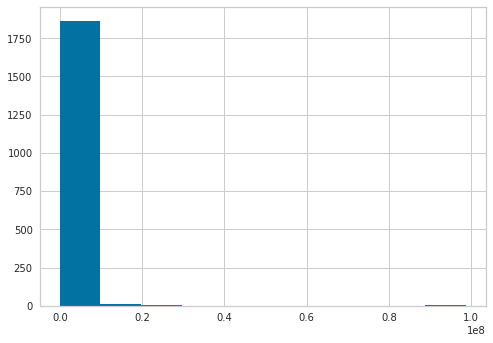

In [387]:
df["view_count"].hist()

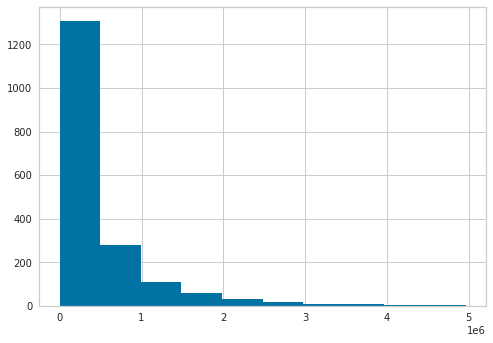

In [388]:
df = df[df["view_count"] < 5*1e6]
df["view_count"].hist()

# Analysis

## Overall trending

#### Content Freshness

Most trending videos made within 1-3 days of trending

In [389]:
df["upload_days_before_trending"].describe()

count    1833.000000
mean        2.192580
std         1.385952
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        11.000000
Name: upload_days_before_trending, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


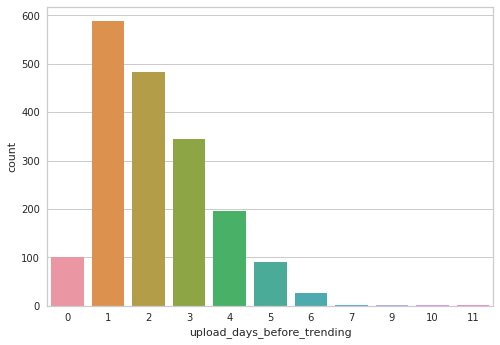

In [390]:
sns.countplot(df["upload_days_before_trending"])

There's a common trend of less number gets on trending when contents gets older for every category.

It can be concluded that ***freshness*** plays a big part of video being on trending

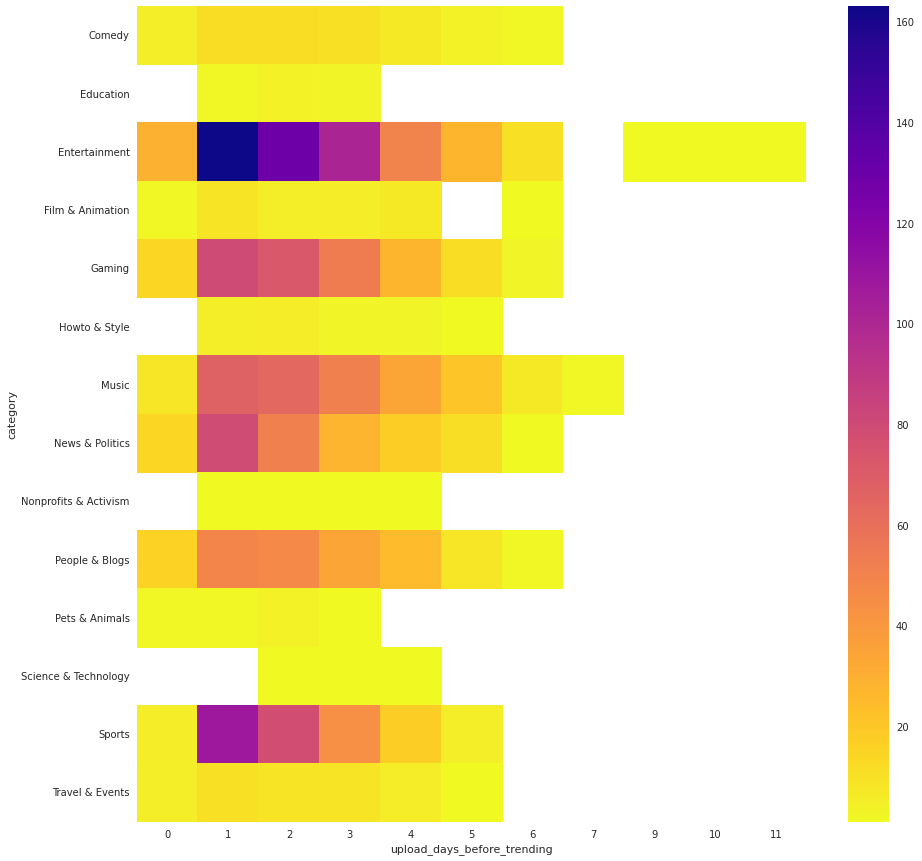

In [391]:
trend_duration = df.groupby(["category","upload_days_before_trending"]).count()["video_id"].unstack()
plt.figure(figsize=(15,15))
sns.heatmap(trend_duration, cmap="plasma_r")

#### 10 Most Trending Channels

In [392]:
trending_channels = df["channelTitle"].value_counts().nlargest(10).sort_values(ascending=False)
channels = trending_channels.index
print("Top 10 trending channels")
print('='*100)
for channel in channels:
  all_categories = ','.join(df[df['channelTitle'] == channel]['category'].unique())
  print(f"{trending_channels[channel]} videos in trending: {channel}")
  print(f"Categories: {all_categories}")
  print('-'*100)

Top 10 trending channels
26 videos in trending: Thairath Online
Categories: News & Politics,Entertainment
----------------------------------------------------------------------------------------------------
24 videos in trending: GOTJISIRI CH
Categories: Sports
----------------------------------------------------------------------------------------------------
22 videos in trending: โหนกระแส (Hone-Krasae) Official
Categories: News & Politics
----------------------------------------------------------------------------------------------------
20 videos in trending: HEARTROCKER
Categories: Gaming
----------------------------------------------------------------------------------------------------
19 videos in trending: โฟกัสแอนด์ฟิล์ม แฟมมิลี่แก๊งค์
Categories: Entertainment
----------------------------------------------------------------------------------------------------
19 videos in trending: TrueVisionsOfficial
Categories: Sports
-------------------------------------------------------

#### 10 Most Appeared Trending Videos

In [393]:
trending_videos = df["video_id"].value_counts().nlargest(10).sort_values(ascending=False)
vid_ids = trending_videos.index
print("Top 10 trending videos")
print('='*100)
for vid_id in vid_ids:
  vid_df = df[df["video_id"] == vid_id].iloc[0]
  print(f"{trending_videos[vid_id]} days in trending:\t{vid_df['title']}\n\t\t\tCategory: {vid_df['category']}")
  print('-'*100)

Top 10 trending videos
9 days in trending:	เตือนภัย อันตราย ทิ้งน้อง เล่นน้ำคนเดียว  ละคร
			Category: Entertainment
----------------------------------------------------------------------------------------------------
9 days in trending:	ชุดสืบผี • คุณจ่าบอส | 24 เม.ย. 65 | THE GHOST RADIO
			Category: Entertainment
----------------------------------------------------------------------------------------------------
9 days in trending:	PASULOL นิทานทำลายสมอง3
			Category: Comedy
----------------------------------------------------------------------------------------------------
8 days in trending:	เคลียร์ทุกปม! เกรท-แพทริเซีย-เมย์ ปทิดา | แอน-แอฟ เปิดศึกชิง กงยู | 3 แซ่บ (Full) 24 เม.ย. 65
			Category: Entertainment
----------------------------------------------------------------------------------------------------
8 days in trending:	เปิดหน้าคุยกันครั้งแรก
			Category: People & Blogs
----------------------------------------------------------------------------------------------------
8 

### Title, Description, and Tags Wordclouds

In [394]:
#get_word_clouds(df)

## Category

In [395]:
def get_top_three_channel(cat_df):
  top_3 = cat_df["channelTitle"].value_counts().nlargest(3)
  channels = top_3.index
  cnt = 0
  for idx, channel in enumerate(channels):
    print(f"{idx+1})\t{channel}\t\tNumber of trending video: {top_3[channel]}")

In [396]:
def get_word_clouds(cat_df):
  cols = ["title", "description", "tags"]
  fig, axs = plt.subplots(1,len(cols),figsize=(25,25))
  for i, col in enumerate(cols):
    axs[i].imshow(word_cloud(cat_df[col].apply(tokenize) if not (col == "tags") else  cat_df[col]), interpolation="bilinear")
    axs[i].title.set_text(f"Word cloud of {col}")
    axs[i].axis('off')

#### Most trending category

View top 10 most appeared category in trending

Entertainment is the most trending category followed by gaming and sports. While pets & animals has the least apperance in trending

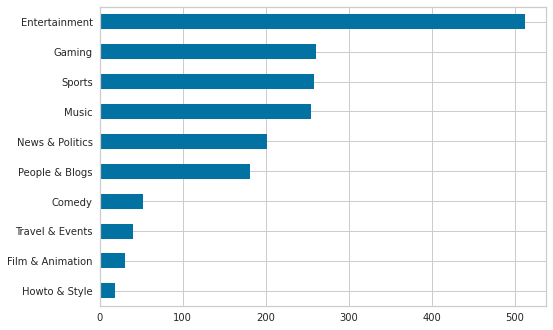

In [397]:
df["category"].value_counts().nlargest(10).sort_values().plot(kind="barh")

Average views for each category in trending

Surprisingly, Comedy videos has the highest average views followed by sports and music. While education and non profits has the least views

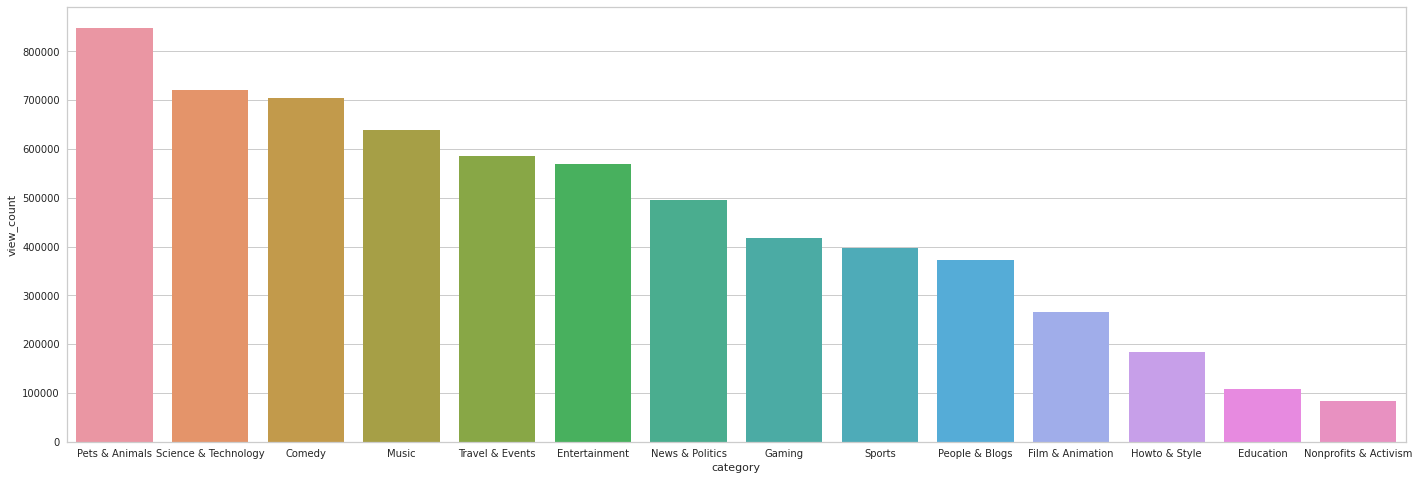

In [398]:
plt.figure(figsize=(24,8))
category_views = df.groupby("category").mean()["view_count"].sort_values(ascending=False)
sns.barplot(x=category_views.index, y=category_views)

### Comedy

In [399]:
comedy_df = df[df["category"] == "Comedy"]

#### Top 3 Trending Comedy Channels

In [400]:
get_top_three_channel(comedy_df)

1)	ohana clip		Number of trending video: 9
2)	PASULOL		Number of trending video: 9
3)	สจ.นัมเบอร์วัน		Number of trending video: 8


#### Title, Description, and Tags Wordclouds

In [401]:
#get_word_clouds(comedy_df)

### Music

In [402]:
music_df = df[df["category"] == "Music"]

#### Top 3 Trending Sports Channels

In [403]:
get_top_three_channel(music_df)

1)	เนสกาแฟ ศรีนคร Official		Number of trending video: 16
2)	Nadao Music		Number of trending video: 15
3)	BOXX MUSIC		Number of trending video: 10


#### Title, Description, and Tags Wordclouds

In [404]:
#get_word_clouds(music_df)

### Entertainment

In [405]:
entertainment_df = df[df["category"] == "Entertainment"]

#### Top 3 Most Entertainment Channels

In [406]:
get_top_three_channel(entertainment_df)

1)	โฟกัสแอนด์ฟิล์ม แฟมมิลี่แก๊งค์		Number of trending video: 19
2)	My Mate Nate		Number of trending video: 18
3)	WorkpointOfficial		Number of trending video: 16


#### Title, Description, and Tags Wordclouds

It seems like Thai people prefers watching Series or episodic video contents due to high appearance of "EP" "Series" "Full".

Additionally, entertainment videos often adds "ติดตาม" in the description


In [407]:
#get_word_clouds(entertainment_df)

### Pets & Animals

In [408]:
pets_animals_df = df[df["category"] == "Pets & Animals"]

#### Top 3 Trending Pets & Animals

In [409]:
get_top_three_channel(pets_animals_df)

1)	OAUJUN HI-END		Number of trending video: 9


#### Title, Description, and Tags Wordclouds

In [410]:
#get_word_clouds(pets_animals_df)

## Comments

### Comment count vs View count

There's a slight linear relationship between comment_count and view count.

Having high comment count is a partial factor in having a high view count

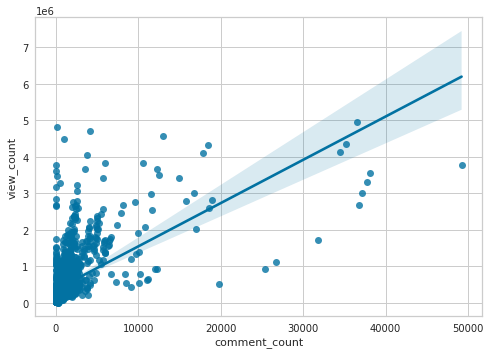

In [411]:
sns.regplot(x=df["comment_count"], y=df["view_count"])

### Comments enabled vs disabled

Comments are enabled for most of the videos in trending. It's good to keep an open discussion!

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


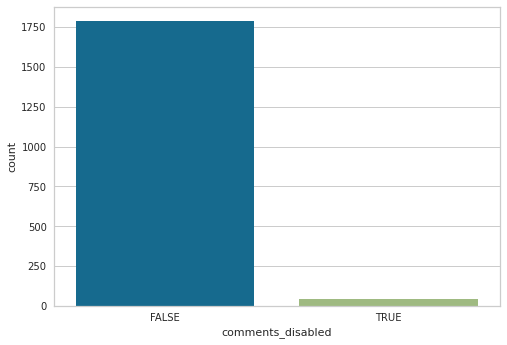

In [412]:
sns.countplot(df["comments_disabled"])

### Comment enabled/disabled vs View Count

Comments disabled will have less view count than videos with comments on regardless of category

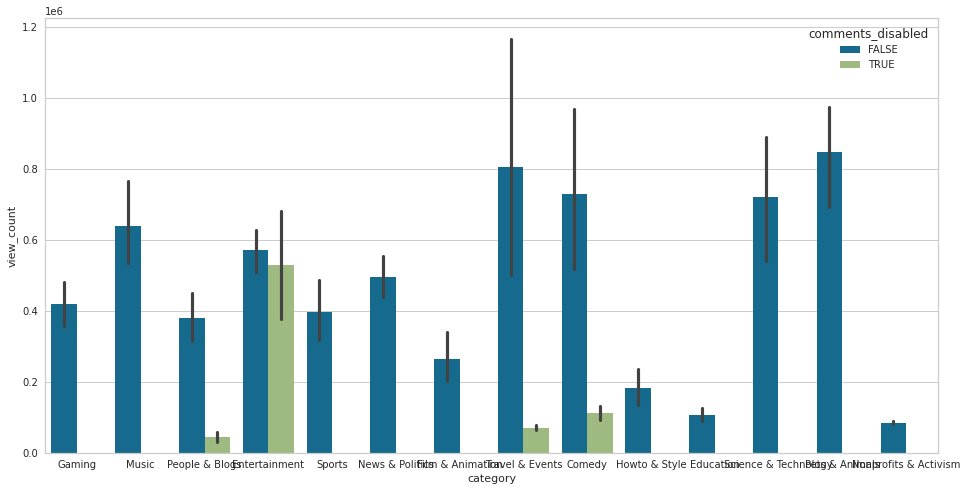

In [413]:
plt.figure(figsize=(16,8))
sns.barplot(x="category",y="view_count", hue="comments_disabled", data=df)

### Most commented category

Pets & animals gains the most discussion while Science & Technology has the least

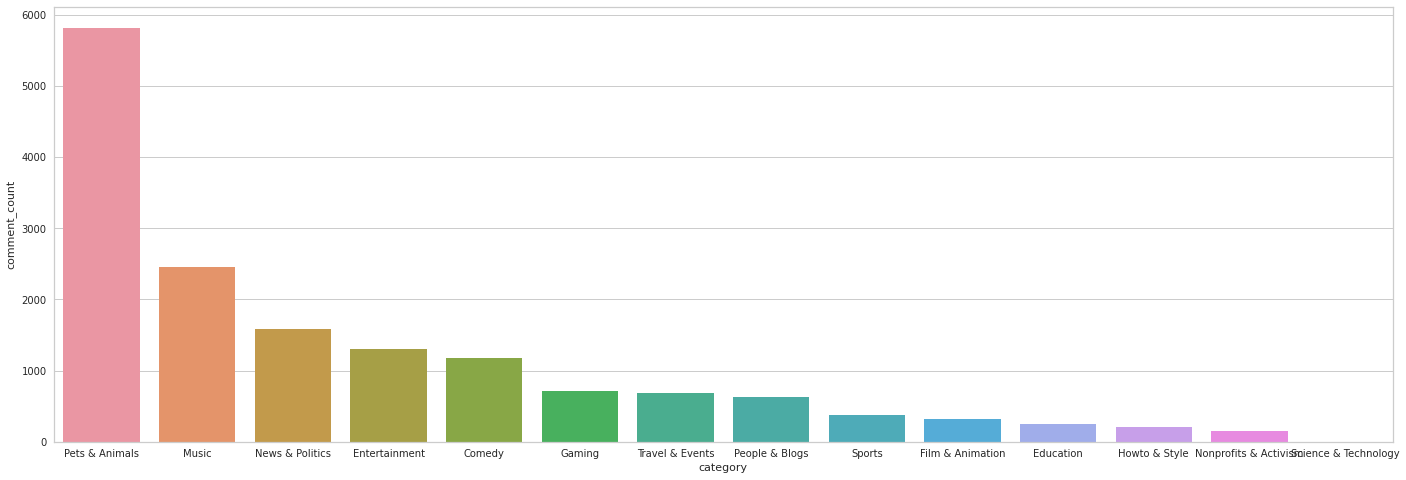

In [414]:
plt.figure(figsize=(24,8))
comment_count = df.groupby("category").mean()["comment_count"].sort_values(ascending=False)
sns.barplot(x=comment_count.index, y=comment_count)

## Tags

#### With or Without Tags

Most of the trending videos are tagged, this might be due to youtube algorithm looking for tags to categorize videos to futher target appropriate audience

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


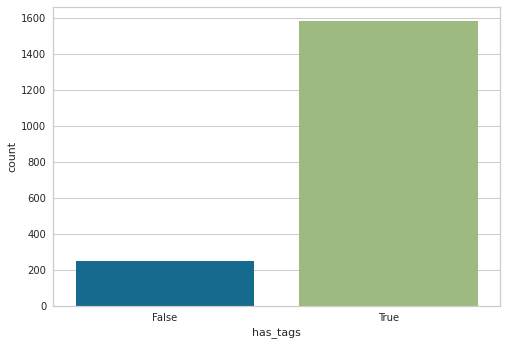

In [415]:
sns.countplot(df["has_tags"])

#### Tag vs Views

Taking a look at median views of videos with tags and no tags, the difference values are minimal. Therefore it can be inferred that tags does not influence view count.

In [416]:
df[df["has_tags"]]["view_count"].describe()

count    1.582000e+03
mean     5.091629e+05
std      6.747800e+05
min      0.000000e+00
25%      1.164480e+05
50%      2.785665e+05
75%      5.671872e+05
max      4.960253e+06
Name: view_count, dtype: float64

In [417]:
df[df["has_tags"] == False]["view_count"].describe()

count    2.510000e+02
mean     4.348893e+05
std      6.033097e+05
min      1.349000e+04
25%      7.045100e+04
50%      2.209760e+05
75%      5.600770e+05
max      4.473836e+06
Name: view_count, dtype: float64

#### Number of Tags in Videos

Average number of tags in a video is 15

In [418]:
df["no_tags"] = df["tags"].apply(lambda x: len(x))
df["no_tags"].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


count    1833.000000
mean       15.078560
std        13.094481
min         0.000000
25%         5.000000
50%        12.000000
75%        22.000000
max        93.000000
Name: no_tags, dtype: float64

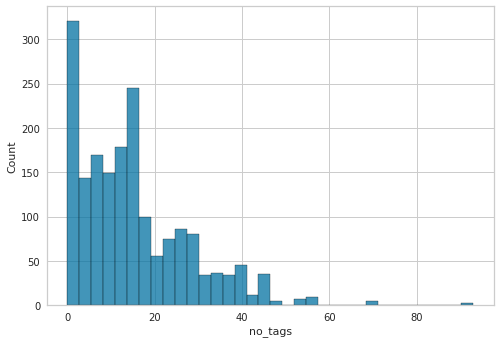

In [419]:
sns.histplot(df["no_tags"])

#### Number of Tags vs Views

There is close to no linear relationship between number of tags and view counts.

It can be 

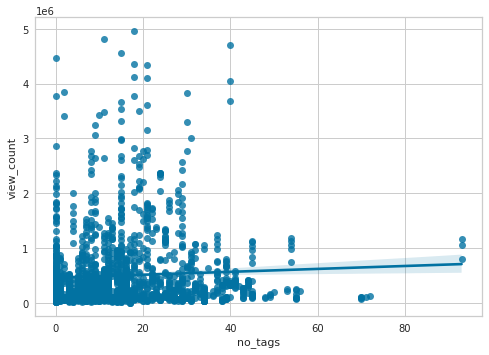

In [420]:
sns.regplot(x=df["no_tags"], y=df["view_count"])

## Time

### Day published

In [421]:
df["published_day"] = pd.to_datetime(df["publishedAt"]).apply(lambda x: x.strftime("%A"))
df["published_day"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0       Saturday
1         Friday
2         Friday
3       Saturday
4         Friday
          ...   
1879     Tuesday
1880      Friday
1881      Monday
1882    Thursday
1883    Thursday
Name: published_day, Length: 1833, dtype: object

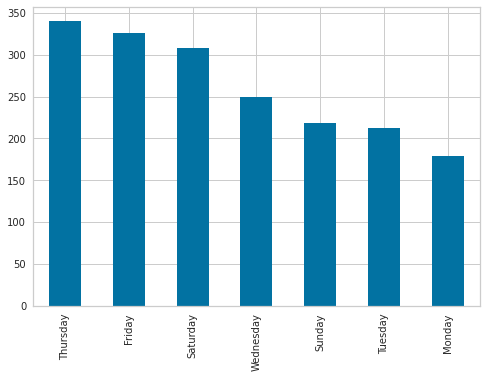

In [422]:
df["published_day"].value_counts().sort_values(ascending=False).plot(kind="bar")

In [423]:
df["published_hour"] = pd.to_datetime(df["publishedAt"]).apply(lambda x: x.hour)
df["published_hour"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0       11
1       12
2       12
3       10
4       10
        ..
1879    15
1880     2
1881     3
1882     8
1883     9
Name: published_hour, Length: 1833, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


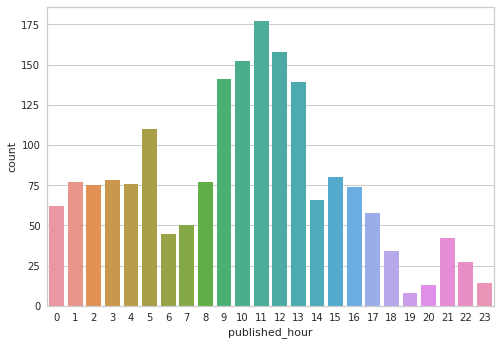

In [424]:
sns.countplot(df["published_hour"])

# Model

## Model Preprocesing

### Drop single use / redundant columns

video_id, channel_id, thumbnail_link are single use

Likes and Dislikes are always zero due to the new youtube policy on not disclosing ratings

category_id numerical version of category, we'll be using string category to perform one hot encoding

In [425]:
to_drop = [
           "video_id",
           "channelId",
           "thumbnail_link",
           "likes",
           "dislikes",
           "categoryId"
]

In [426]:
model_df = df.drop(columns=to_drop)
model_df

,title,publishedAt,channelTitle,trending_date,tags,view_count,comment_count,comments_disabled,ratings_disabled,description,category,upload_days_before_trending,has_tags,no_tags,published_day,published_hour
0,เอาชีวิตรอด 100 วัน HARDCORE Minecraft จาก ห้ว...,2022-04-23T11:16:18Z,Aekk,22.24.04,"[Minecraft, มายคราฟ, เอาชีวิตรอด 100วัน, Minec...",390307,2040,FALSE,TRUE,ทุกคนที่เข้าร่วมสามารถได้รับ 172 เพชร(หรือเงิน...,Gaming,1,True,45,Saturday,11
1,F.HERO x VannDa Ft. 1MILL & SPRITE - RUN THE T...,2022-04-22T12:00:25Z,High Cloud Entertainment,22.24.04,"[น้ำหอมดิออร์มันอยู่ที่คอ, รันเดอะทาว, F.HERO,...",1915653,9925,FALSE,TRUE,WE ARE READY TO #RUNTHETOWN !🎧 https://bfan.li...,Music,2,True,15,Friday,12
2,ซอยชื่อแปลก หลงทั้งพิธีกร แขกรับเชิญ ยันทีมงาน...,2022-04-22T12:00:34Z,GoodDayOfficial,22.24.04,"[kodey, แม่เราชัดๆ, วัยรุ่น, contrast, ความแตก...",739679,874,FALSE,TRUE,https://www.facebook.com/Gooddayofficial-22080...,People & Blogs,2,True,54,Friday,12
3,🔴LIVE ศึกคัดเลือกตัวแทนไทย AIC 2022 Pro Qualif...,2022-04-23T10:50:48Z,Garena RoV Thailand,22.24.04,[],781650,213,FALSE,TRUE,🔴LIVE วันนี้พบศึกชิงตั๋วทีมที่ 2 ไป AIC 2022AI...,Gaming,1,False,0,Saturday,10
4,ได้อยู่ - โอ๊ต ปราโมทย์ feat. MILLI [Official MV],2022-04-22T10:00:12Z,KHOTKOOL MUSIC,22.24.04,"[ได้อยู่, แก่น, โอ๊ตปราโมทย์, OatPramote, MILL...",877580,986,FALSE,TRUE,Produced by Janpat MontrelerdrasmeLyric & Comp...,Music,2,True,9,Friday,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,สุดดราม่า! เงินบริจาค 1.8 ล้านไม่พอ แม่ลูก 3 โ...,2022-04-26T15:53:24Z,Nation online,22.01.05,"[ข่าวด่วน, ดูคลิป, รายการทีวี, รายการย้อนหลัง,...",734046,4055,FALSE,TRUE,รับชมวีดีโอที่คัดสรรจากเรา https://bit.ly/31bY...,News & Politics,5,True,12,Tuesday,15
1880,อย่ามาหลอย -เปรี้ยว แทน บาส【OFFICIAL MV】,2022-04-29T02:09:00Z,ค่ายเพลง ได้หมดถ้าสดชื่น,22.01.05,[],295176,707,FALSE,TRUE,เพลง - อย่ามาหลอยขับร้อง -เปรี้ยว แทน บาส - ผู...,Entertainment,2,False,0,Friday,2
1881,ชุดสืบผี • คุณจ่าบอส | 24 เม.ย. 65 | THE GHOST...,2022-04-25T03:01:09Z,TheghostradioOfficial,22.01.05,"[รวมเรื่องหลอน, เดอะโกสย้อนหลัง, เดอะโกส, ฟังแ...",799439,424,FALSE,TRUE,เป็นเรื่องที่เกิดขึ้นตอนทำงานอยู่ฝ่ายสืบสวน แล...,Entertainment,6,True,39,Monday,3
1882,ต่าย สายธาร โดนหลอกทั้งประเทศ ไม่ใช่แค่ หนุ่ม ...,2022-04-28T08:50:00Z,ข่าวเด่นข่าวเด็ด,22.01.05,"[ข่าวเด่นข่าวเด็ด, ต่าย สายธาร โดนหลอกทั้งประเ...",676433,403,FALSE,TRUE,ต่าย สายธาร โดนหลอกทั้งประเทศ ไม่ใช่แค่ หนุ่ม ...,Entertainment,3,True,30,Thursday,8


### One hot encode publish day

In [427]:
model_df = model_df.join(pd.get_dummies(df["published_day"], prefix="published_day"))
model_df

,title,publishedAt,channelTitle,trending_date,tags,view_count,comment_count,comments_disabled,ratings_disabled,description,...,no_tags,published_day,published_hour,published_day_Friday,published_day_Monday,published_day_Saturday,published_day_Sunday,published_day_Thursday,published_day_Tuesday,published_day_Wednesday
0,เอาชีวิตรอด 100 วัน HARDCORE Minecraft จาก ห้ว...,2022-04-23T11:16:18Z,Aekk,22.24.04,"[Minecraft, มายคราฟ, เอาชีวิตรอด 100วัน, Minec...",390307,2040,FALSE,TRUE,ทุกคนที่เข้าร่วมสามารถได้รับ 172 เพชร(หรือเงิน...,...,45,Saturday,11,0,0,1,0,0,0,0
1,F.HERO x VannDa Ft. 1MILL & SPRITE - RUN THE T...,2022-04-22T12:00:25Z,High Cloud Entertainment,22.24.04,"[น้ำหอมดิออร์มันอยู่ที่คอ, รันเดอะทาว, F.HERO,...",1915653,9925,FALSE,TRUE,WE ARE READY TO #RUNTHETOWN !🎧 https://bfan.li...,...,15,Friday,12,1,0,0,0,0,0,0
2,ซอยชื่อแปลก หลงทั้งพิธีกร แขกรับเชิญ ยันทีมงาน...,2022-04-22T12:00:34Z,GoodDayOfficial,22.24.04,"[kodey, แม่เราชัดๆ, วัยรุ่น, contrast, ความแตก...",739679,874,FALSE,TRUE,https://www.facebook.com/Gooddayofficial-22080...,...,54,Friday,12,1,0,0,0,0,0,0
3,🔴LIVE ศึกคัดเลือกตัวแทนไทย AIC 2022 Pro Qualif...,2022-04-23T10:50:48Z,Garena RoV Thailand,22.24.04,[],781650,213,FALSE,TRUE,🔴LIVE วันนี้พบศึกชิงตั๋วทีมที่ 2 ไป AIC 2022AI...,...,0,Saturday,10,0,0,1,0,0,0,0
4,ได้อยู่ - โอ๊ต ปราโมทย์ feat. MILLI [Official MV],2022-04-22T10:00:12Z,KHOTKOOL MUSIC,22.24.04,"[ได้อยู่, แก่น, โอ๊ตปราโมทย์, OatPramote, MILL...",877580,986,FALSE,TRUE,Produced by Janpat MontrelerdrasmeLyric & Comp...,...,9,Friday,10,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,สุดดราม่า! เงินบริจาค 1.8 ล้านไม่พอ แม่ลูก 3 โ...,2022-04-26T15:53:24Z,Nation online,22.01.05,"[ข่าวด่วน, ดูคลิป, รายการทีวี, รายการย้อนหลัง,...",734046,4055,FALSE,TRUE,รับชมวีดีโอที่คัดสรรจากเรา https://bit.ly/31bY...,...,12,Tuesday,15,0,0,0,0,0,1,0
1880,อย่ามาหลอย -เปรี้ยว แทน บาส【OFFICIAL MV】,2022-04-29T02:09:00Z,ค่ายเพลง ได้หมดถ้าสดชื่น,22.01.05,[],295176,707,FALSE,TRUE,เพลง - อย่ามาหลอยขับร้อง -เปรี้ยว แทน บาส - ผู...,...,0,Friday,2,1,0,0,0,0,0,0
1881,ชุดสืบผี • คุณจ่าบอส | 24 เม.ย. 65 | THE GHOST...,2022-04-25T03:01:09Z,TheghostradioOfficial,22.01.05,"[รวมเรื่องหลอน, เดอะโกสย้อนหลัง, เดอะโกส, ฟังแ...",799439,424,FALSE,TRUE,เป็นเรื่องที่เกิดขึ้นตอนทำงานอยู่ฝ่ายสืบสวน แล...,...,39,Monday,3,0,1,0,0,0,0,0
1882,ต่าย สายธาร โดนหลอกทั้งประเทศ ไม่ใช่แค่ หนุ่ม ...,2022-04-28T08:50:00Z,ข่าวเด่นข่าวเด็ด,22.01.05,"[ข่าวเด่นข่าวเด็ด, ต่าย สายธาร โดนหลอกทั้งประเ...",676433,403,FALSE,TRUE,ต่าย สายธาร โดนหลอกทั้งประเทศ ไม่ใช่แค่ หนุ่ม ...,...,30,Thursday,8,0,0,0,0,1,0,0


### One hot encode publish period

Convert published hour into periods

Period | Duration
--- | ---
***Morning*** | 05:00 - 12:00
***Afternoon*** | 12:00 - 17:00
***Evening*** | 17:00 - 21:00
***Night*** | 21:00 - 04:00

In [428]:
def period(hour):
  if(hour >= 21): return "Night"
  if(hour >= 17): return "Evening"
  if(hour >= 12): return "Afternoon"
  if(hour >= 5):  return "Morning"
  return "Night"

In [429]:
model_df["published_period"] = model_df["published_hour"].apply(period)
model_df["published_period"]

0         Morning
1       Afternoon
2       Afternoon
3         Morning
4         Morning
          ...    
1879    Afternoon
1880        Night
1881        Night
1882      Morning
1883      Morning
Name: published_period, Length: 1833, dtype: object

One hot encode

In [430]:
model_df = model_df.join(pd.get_dummies(model_df["published_period"], prefix="published_period"))
model_df

,title,publishedAt,channelTitle,trending_date,tags,view_count,comment_count,comments_disabled,ratings_disabled,description,...,published_day_Saturday,published_day_Sunday,published_day_Thursday,published_day_Tuesday,published_day_Wednesday,published_period,published_period_Afternoon,published_period_Evening,published_period_Morning,published_period_Night
0,เอาชีวิตรอด 100 วัน HARDCORE Minecraft จาก ห้ว...,2022-04-23T11:16:18Z,Aekk,22.24.04,"[Minecraft, มายคราฟ, เอาชีวิตรอด 100วัน, Minec...",390307,2040,FALSE,TRUE,ทุกคนที่เข้าร่วมสามารถได้รับ 172 เพชร(หรือเงิน...,...,1,0,0,0,0,Morning,0,0,1,0
1,F.HERO x VannDa Ft. 1MILL & SPRITE - RUN THE T...,2022-04-22T12:00:25Z,High Cloud Entertainment,22.24.04,"[น้ำหอมดิออร์มันอยู่ที่คอ, รันเดอะทาว, F.HERO,...",1915653,9925,FALSE,TRUE,WE ARE READY TO #RUNTHETOWN !🎧 https://bfan.li...,...,0,0,0,0,0,Afternoon,1,0,0,0
2,ซอยชื่อแปลก หลงทั้งพิธีกร แขกรับเชิญ ยันทีมงาน...,2022-04-22T12:00:34Z,GoodDayOfficial,22.24.04,"[kodey, แม่เราชัดๆ, วัยรุ่น, contrast, ความแตก...",739679,874,FALSE,TRUE,https://www.facebook.com/Gooddayofficial-22080...,...,0,0,0,0,0,Afternoon,1,0,0,0
3,🔴LIVE ศึกคัดเลือกตัวแทนไทย AIC 2022 Pro Qualif...,2022-04-23T10:50:48Z,Garena RoV Thailand,22.24.04,[],781650,213,FALSE,TRUE,🔴LIVE วันนี้พบศึกชิงตั๋วทีมที่ 2 ไป AIC 2022AI...,...,1,0,0,0,0,Morning,0,0,1,0
4,ได้อยู่ - โอ๊ต ปราโมทย์ feat. MILLI [Official MV],2022-04-22T10:00:12Z,KHOTKOOL MUSIC,22.24.04,"[ได้อยู่, แก่น, โอ๊ตปราโมทย์, OatPramote, MILL...",877580,986,FALSE,TRUE,Produced by Janpat MontrelerdrasmeLyric & Comp...,...,0,0,0,0,0,Morning,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,สุดดราม่า! เงินบริจาค 1.8 ล้านไม่พอ แม่ลูก 3 โ...,2022-04-26T15:53:24Z,Nation online,22.01.05,"[ข่าวด่วน, ดูคลิป, รายการทีวี, รายการย้อนหลัง,...",734046,4055,FALSE,TRUE,รับชมวีดีโอที่คัดสรรจากเรา https://bit.ly/31bY...,...,0,0,0,1,0,Afternoon,1,0,0,0
1880,อย่ามาหลอย -เปรี้ยว แทน บาส【OFFICIAL MV】,2022-04-29T02:09:00Z,ค่ายเพลง ได้หมดถ้าสดชื่น,22.01.05,[],295176,707,FALSE,TRUE,เพลง - อย่ามาหลอยขับร้อง -เปรี้ยว แทน บาส - ผู...,...,0,0,0,0,0,Night,0,0,0,1
1881,ชุดสืบผี • คุณจ่าบอส | 24 เม.ย. 65 | THE GHOST...,2022-04-25T03:01:09Z,TheghostradioOfficial,22.01.05,"[รวมเรื่องหลอน, เดอะโกสย้อนหลัง, เดอะโกส, ฟังแ...",799439,424,FALSE,TRUE,เป็นเรื่องที่เกิดขึ้นตอนทำงานอยู่ฝ่ายสืบสวน แล...,...,0,0,0,0,0,Night,0,0,0,1
1882,ต่าย สายธาร โดนหลอกทั้งประเทศ ไม่ใช่แค่ หนุ่ม ...,2022-04-28T08:50:00Z,ข่าวเด่นข่าวเด็ด,22.01.05,"[ข่าวเด่นข่าวเด็ด, ต่าย สายธาร โดนหลอกทั้งประเ...",676433,403,FALSE,TRUE,ต่าย สายธาร โดนหลอกทั้งประเทศ ไม่ใช่แค่ หนุ่ม ...,...,0,0,1,0,0,Morning,0,0,1,0


Drop publish_hour since we'll be using published_period instead

In [431]:
model_df = model_df.drop(columns=["published_hour"])
model_df

,title,publishedAt,channelTitle,trending_date,tags,view_count,comment_count,comments_disabled,ratings_disabled,description,...,published_day_Saturday,published_day_Sunday,published_day_Thursday,published_day_Tuesday,published_day_Wednesday,published_period,published_period_Afternoon,published_period_Evening,published_period_Morning,published_period_Night
0,เอาชีวิตรอด 100 วัน HARDCORE Minecraft จาก ห้ว...,2022-04-23T11:16:18Z,Aekk,22.24.04,"[Minecraft, มายคราฟ, เอาชีวิตรอด 100วัน, Minec...",390307,2040,FALSE,TRUE,ทุกคนที่เข้าร่วมสามารถได้รับ 172 เพชร(หรือเงิน...,...,1,0,0,0,0,Morning,0,0,1,0
1,F.HERO x VannDa Ft. 1MILL & SPRITE - RUN THE T...,2022-04-22T12:00:25Z,High Cloud Entertainment,22.24.04,"[น้ำหอมดิออร์มันอยู่ที่คอ, รันเดอะทาว, F.HERO,...",1915653,9925,FALSE,TRUE,WE ARE READY TO #RUNTHETOWN !🎧 https://bfan.li...,...,0,0,0,0,0,Afternoon,1,0,0,0
2,ซอยชื่อแปลก หลงทั้งพิธีกร แขกรับเชิญ ยันทีมงาน...,2022-04-22T12:00:34Z,GoodDayOfficial,22.24.04,"[kodey, แม่เราชัดๆ, วัยรุ่น, contrast, ความแตก...",739679,874,FALSE,TRUE,https://www.facebook.com/Gooddayofficial-22080...,...,0,0,0,0,0,Afternoon,1,0,0,0
3,🔴LIVE ศึกคัดเลือกตัวแทนไทย AIC 2022 Pro Qualif...,2022-04-23T10:50:48Z,Garena RoV Thailand,22.24.04,[],781650,213,FALSE,TRUE,🔴LIVE วันนี้พบศึกชิงตั๋วทีมที่ 2 ไป AIC 2022AI...,...,1,0,0,0,0,Morning,0,0,1,0
4,ได้อยู่ - โอ๊ต ปราโมทย์ feat. MILLI [Official MV],2022-04-22T10:00:12Z,KHOTKOOL MUSIC,22.24.04,"[ได้อยู่, แก่น, โอ๊ตปราโมทย์, OatPramote, MILL...",877580,986,FALSE,TRUE,Produced by Janpat MontrelerdrasmeLyric & Comp...,...,0,0,0,0,0,Morning,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,สุดดราม่า! เงินบริจาค 1.8 ล้านไม่พอ แม่ลูก 3 โ...,2022-04-26T15:53:24Z,Nation online,22.01.05,"[ข่าวด่วน, ดูคลิป, รายการทีวี, รายการย้อนหลัง,...",734046,4055,FALSE,TRUE,รับชมวีดีโอที่คัดสรรจากเรา https://bit.ly/31bY...,...,0,0,0,1,0,Afternoon,1,0,0,0
1880,อย่ามาหลอย -เปรี้ยว แทน บาส【OFFICIAL MV】,2022-04-29T02:09:00Z,ค่ายเพลง ได้หมดถ้าสดชื่น,22.01.05,[],295176,707,FALSE,TRUE,เพลง - อย่ามาหลอยขับร้อง -เปรี้ยว แทน บาส - ผู...,...,0,0,0,0,0,Night,0,0,0,1
1881,ชุดสืบผี • คุณจ่าบอส | 24 เม.ย. 65 | THE GHOST...,2022-04-25T03:01:09Z,TheghostradioOfficial,22.01.05,"[รวมเรื่องหลอน, เดอะโกสย้อนหลัง, เดอะโกส, ฟังแ...",799439,424,FALSE,TRUE,เป็นเรื่องที่เกิดขึ้นตอนทำงานอยู่ฝ่ายสืบสวน แล...,...,0,0,0,0,0,Night,0,0,0,1
1882,ต่าย สายธาร โดนหลอกทั้งประเทศ ไม่ใช่แค่ หนุ่ม ...,2022-04-28T08:50:00Z,ข่าวเด่นข่าวเด็ด,22.01.05,"[ข่าวเด่นข่าวเด็ด, ต่าย สายธาร โดนหลอกทั้งประเ...",676433,403,FALSE,TRUE,ต่าย สายธาร โดนหลอกทั้งประเทศ ไม่ใช่แค่ หนุ่ม ...,...,0,0,1,0,0,Morning,0,0,1,0


### Categorize videos into two trending type

***Early Trender*** (Type 0): Time it takes for the video to get pushed to trending page is less median

***Late Trender*** (Type 1): Time it takes for the video to get pushed to trending page is more or equal to median

In [432]:
model_df["trending_type"] = model_df["upload_days_before_trending"].apply(lambda x: 0 if x < model_df["upload_days_before_trending"].median() else 1)
model_df["trending_type"]

0       0
1       1
2       1
3       0
4       1
       ..
1879    1
1880    1
1881    1
1882    1
1883    1
Name: trending_type, Length: 1833, dtype: int64

Drop upload_days_before_trending since it's a parameter we wish to do classification on (trending type)

In [433]:
model_df = model_df.drop(columns=["upload_days_before_trending"])
model_df

,title,publishedAt,channelTitle,trending_date,tags,view_count,comment_count,comments_disabled,ratings_disabled,description,...,published_day_Sunday,published_day_Thursday,published_day_Tuesday,published_day_Wednesday,published_period,published_period_Afternoon,published_period_Evening,published_period_Morning,published_period_Night,trending_type
0,เอาชีวิตรอด 100 วัน HARDCORE Minecraft จาก ห้ว...,2022-04-23T11:16:18Z,Aekk,22.24.04,"[Minecraft, มายคราฟ, เอาชีวิตรอด 100วัน, Minec...",390307,2040,FALSE,TRUE,ทุกคนที่เข้าร่วมสามารถได้รับ 172 เพชร(หรือเงิน...,...,0,0,0,0,Morning,0,0,1,0,0
1,F.HERO x VannDa Ft. 1MILL & SPRITE - RUN THE T...,2022-04-22T12:00:25Z,High Cloud Entertainment,22.24.04,"[น้ำหอมดิออร์มันอยู่ที่คอ, รันเดอะทาว, F.HERO,...",1915653,9925,FALSE,TRUE,WE ARE READY TO #RUNTHETOWN !🎧 https://bfan.li...,...,0,0,0,0,Afternoon,1,0,0,0,1
2,ซอยชื่อแปลก หลงทั้งพิธีกร แขกรับเชิญ ยันทีมงาน...,2022-04-22T12:00:34Z,GoodDayOfficial,22.24.04,"[kodey, แม่เราชัดๆ, วัยรุ่น, contrast, ความแตก...",739679,874,FALSE,TRUE,https://www.facebook.com/Gooddayofficial-22080...,...,0,0,0,0,Afternoon,1,0,0,0,1
3,🔴LIVE ศึกคัดเลือกตัวแทนไทย AIC 2022 Pro Qualif...,2022-04-23T10:50:48Z,Garena RoV Thailand,22.24.04,[],781650,213,FALSE,TRUE,🔴LIVE วันนี้พบศึกชิงตั๋วทีมที่ 2 ไป AIC 2022AI...,...,0,0,0,0,Morning,0,0,1,0,0
4,ได้อยู่ - โอ๊ต ปราโมทย์ feat. MILLI [Official MV],2022-04-22T10:00:12Z,KHOTKOOL MUSIC,22.24.04,"[ได้อยู่, แก่น, โอ๊ตปราโมทย์, OatPramote, MILL...",877580,986,FALSE,TRUE,Produced by Janpat MontrelerdrasmeLyric & Comp...,...,0,0,0,0,Morning,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,สุดดราม่า! เงินบริจาค 1.8 ล้านไม่พอ แม่ลูก 3 โ...,2022-04-26T15:53:24Z,Nation online,22.01.05,"[ข่าวด่วน, ดูคลิป, รายการทีวี, รายการย้อนหลัง,...",734046,4055,FALSE,TRUE,รับชมวีดีโอที่คัดสรรจากเรา https://bit.ly/31bY...,...,0,0,1,0,Afternoon,1,0,0,0,1
1880,อย่ามาหลอย -เปรี้ยว แทน บาส【OFFICIAL MV】,2022-04-29T02:09:00Z,ค่ายเพลง ได้หมดถ้าสดชื่น,22.01.05,[],295176,707,FALSE,TRUE,เพลง - อย่ามาหลอยขับร้อง -เปรี้ยว แทน บาส - ผู...,...,0,0,0,0,Night,0,0,0,1,1
1881,ชุดสืบผี • คุณจ่าบอส | 24 เม.ย. 65 | THE GHOST...,2022-04-25T03:01:09Z,TheghostradioOfficial,22.01.05,"[รวมเรื่องหลอน, เดอะโกสย้อนหลัง, เดอะโกส, ฟังแ...",799439,424,FALSE,TRUE,เป็นเรื่องที่เกิดขึ้นตอนทำงานอยู่ฝ่ายสืบสวน แล...,...,0,0,0,0,Night,0,0,0,1,1
1882,ต่าย สายธาร โดนหลอกทั้งประเทศ ไม่ใช่แค่ หนุ่ม ...,2022-04-28T08:50:00Z,ข่าวเด่นข่าวเด็ด,22.01.05,"[ข่าวเด่นข่าวเด็ด, ต่าย สายธาร โดนหลอกทั้งประเ...",676433,403,FALSE,TRUE,ต่าย สายธาร โดนหลอกทั้งประเทศ ไม่ใช่แค่ หนุ่ม ...,...,0,1,0,0,Morning,0,0,1,0,1


### One hot encode category

Process category to only have the top 10 most frequent, label rest as "Others"

In [434]:
top_10_cat = model_df["category"].value_counts().nlargest(10).index
model_df["category"] = model_df["category"].apply(lambda x: x if x in top_10_cat else "Others")

One hot encode

In [435]:
model_df = model_df.join(pd.get_dummies(df["category"], prefix="category"))
model_df

,title,publishedAt,channelTitle,trending_date,tags,view_count,comment_count,comments_disabled,ratings_disabled,description,...,category_Gaming,category_Howto & Style,category_Music,category_News & Politics,category_Nonprofits & Activism,category_People & Blogs,category_Pets & Animals,category_Science & Technology,category_Sports,category_Travel & Events
0,เอาชีวิตรอด 100 วัน HARDCORE Minecraft จาก ห้ว...,2022-04-23T11:16:18Z,Aekk,22.24.04,"[Minecraft, มายคราฟ, เอาชีวิตรอด 100วัน, Minec...",390307,2040,FALSE,TRUE,ทุกคนที่เข้าร่วมสามารถได้รับ 172 เพชร(หรือเงิน...,...,1,0,0,0,0,0,0,0,0,0
1,F.HERO x VannDa Ft. 1MILL & SPRITE - RUN THE T...,2022-04-22T12:00:25Z,High Cloud Entertainment,22.24.04,"[น้ำหอมดิออร์มันอยู่ที่คอ, รันเดอะทาว, F.HERO,...",1915653,9925,FALSE,TRUE,WE ARE READY TO #RUNTHETOWN !🎧 https://bfan.li...,...,0,0,1,0,0,0,0,0,0,0
2,ซอยชื่อแปลก หลงทั้งพิธีกร แขกรับเชิญ ยันทีมงาน...,2022-04-22T12:00:34Z,GoodDayOfficial,22.24.04,"[kodey, แม่เราชัดๆ, วัยรุ่น, contrast, ความแตก...",739679,874,FALSE,TRUE,https://www.facebook.com/Gooddayofficial-22080...,...,0,0,0,0,0,1,0,0,0,0
3,🔴LIVE ศึกคัดเลือกตัวแทนไทย AIC 2022 Pro Qualif...,2022-04-23T10:50:48Z,Garena RoV Thailand,22.24.04,[],781650,213,FALSE,TRUE,🔴LIVE วันนี้พบศึกชิงตั๋วทีมที่ 2 ไป AIC 2022AI...,...,1,0,0,0,0,0,0,0,0,0
4,ได้อยู่ - โอ๊ต ปราโมทย์ feat. MILLI [Official MV],2022-04-22T10:00:12Z,KHOTKOOL MUSIC,22.24.04,"[ได้อยู่, แก่น, โอ๊ตปราโมทย์, OatPramote, MILL...",877580,986,FALSE,TRUE,Produced by Janpat MontrelerdrasmeLyric & Comp...,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,สุดดราม่า! เงินบริจาค 1.8 ล้านไม่พอ แม่ลูก 3 โ...,2022-04-26T15:53:24Z,Nation online,22.01.05,"[ข่าวด่วน, ดูคลิป, รายการทีวี, รายการย้อนหลัง,...",734046,4055,FALSE,TRUE,รับชมวีดีโอที่คัดสรรจากเรา https://bit.ly/31bY...,...,0,0,0,1,0,0,0,0,0,0
1880,อย่ามาหลอย -เปรี้ยว แทน บาส【OFFICIAL MV】,2022-04-29T02:09:00Z,ค่ายเพลง ได้หมดถ้าสดชื่น,22.01.05,[],295176,707,FALSE,TRUE,เพลง - อย่ามาหลอยขับร้อง -เปรี้ยว แทน บาส - ผู...,...,0,0,0,0,0,0,0,0,0,0
1881,ชุดสืบผี • คุณจ่าบอส | 24 เม.ย. 65 | THE GHOST...,2022-04-25T03:01:09Z,TheghostradioOfficial,22.01.05,"[รวมเรื่องหลอน, เดอะโกสย้อนหลัง, เดอะโกส, ฟังแ...",799439,424,FALSE,TRUE,เป็นเรื่องที่เกิดขึ้นตอนทำงานอยู่ฝ่ายสืบสวน แล...,...,0,0,0,0,0,0,0,0,0,0
1882,ต่าย สายธาร โดนหลอกทั้งประเทศ ไม่ใช่แค่ หนุ่ม ...,2022-04-28T08:50:00Z,ข่าวเด่นข่าวเด็ด,22.01.05,"[ข่าวเด่นข่าวเด็ด, ต่าย สายธาร โดนหลอกทั้งประเ...",676433,403,FALSE,TRUE,ต่าย สายธาร โดนหลอกทั้งประเทศ ไม่ใช่แค่ หนุ่ม ...,...,0,0,0,0,0,0,0,0,0,0


### Convert has_tags boolean -> int

In [436]:
model_df["has_tags"] = model_df["has_tags"].astype(int)
model_df["has_tags"]

0       1
1       1
2       1
3       0
4       1
       ..
1879    1
1880    0
1881    1
1882    1
1883    1
Name: has_tags, Length: 1833, dtype: int64

### Get only numeric data

In [437]:
model_df = model_df._get_numeric_data()
model_df

,view_count,comment_count,has_tags,no_tags,published_day_Friday,published_day_Monday,published_day_Saturday,published_day_Sunday,published_day_Thursday,published_day_Tuesday,...,category_Gaming,category_Howto & Style,category_Music,category_News & Politics,category_Nonprofits & Activism,category_People & Blogs,category_Pets & Animals,category_Science & Technology,category_Sports,category_Travel & Events
0,390307,2040,1,45,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1915653,9925,1,15,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,739679,874,1,54,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,781650,213,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,877580,986,1,9,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,734046,4055,1,12,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1880,295176,707,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1881,799439,424,1,39,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1882,676433,403,1,30,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### Heatmap

While there are some minimal autocorrelated features, overall it looks pretty ok for doing logistic regression

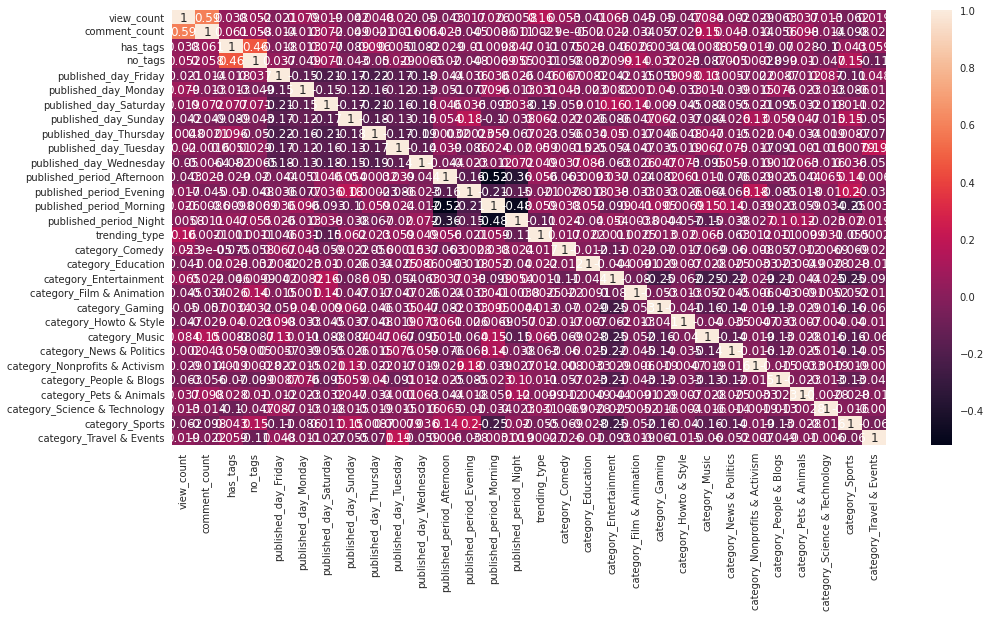

In [438]:
plt.figure(figsize=(16,8))
sns.heatmap(model_df.corr(), annot=True)

### Separate to X and y

In [439]:
X=model_df.drop(columns="trending_type")
y=model_df["trending_type"]

### Split train test

In [440]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train

,view_count,comment_count,has_tags,no_tags,published_day_Friday,published_day_Monday,published_day_Saturday,published_day_Sunday,published_day_Thursday,published_day_Tuesday,...,category_Gaming,category_Howto & Style,category_Music,category_News & Politics,category_Nonprofits & Activism,category_People & Blogs,category_Pets & Animals,category_Science & Technology,category_Sports,category_Travel & Events
987,1555678,2600,1,12,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
903,51333,26,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
563,711292,0,1,2,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1213,94177,54,1,8,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
105,800744,2594,1,27,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,72670,91,1,19,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1701,81397,85,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
460,366522,34,1,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
633,82089,284,1,9,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Normalize non binary values

Normalize non binary values to eleminate any bias on magnitude of the values

In [441]:
X_train.columns

Index(['view_count', 'comment_count', 'has_tags', 'no_tags',
       'published_day_Friday', 'published_day_Monday',
       'published_day_Saturday', 'published_day_Sunday',
       'published_day_Thursday', 'published_day_Tuesday',
       'published_day_Wednesday', 'published_period_Afternoon',
       'published_period_Evening', 'published_period_Morning',
       'published_period_Night', 'category_Comedy', 'category_Education',
       'category_Entertainment', 'category_Film & Animation',
       'category_Gaming', 'category_Howto & Style', 'category_Music',
       'category_News & Politics', 'category_Nonprofits & Activism',
       'category_People & Blogs', 'category_Pets & Animals',
       'category_Science & Technology', 'category_Sports',
       'category_Travel & Events'],
      dtype='object')

In [442]:
to_normalize = [
                "view_count",
                "comment_count",
                "no_tags",
]
scaler = MinMaxScaler()
scaler = scaler.fit(X_train[to_normalize])

X_train_lr = X_train
X_test_lr = X_test

X_train_lr[to_normalize] = scaler.transform(X_train_lr[to_normalize])
X_test_lr[to_normalize] = scaler.transform(X_test_lr[to_normalize])

### Normalized Heatmap

Similar results to before normalized, minimal autocorrelated values

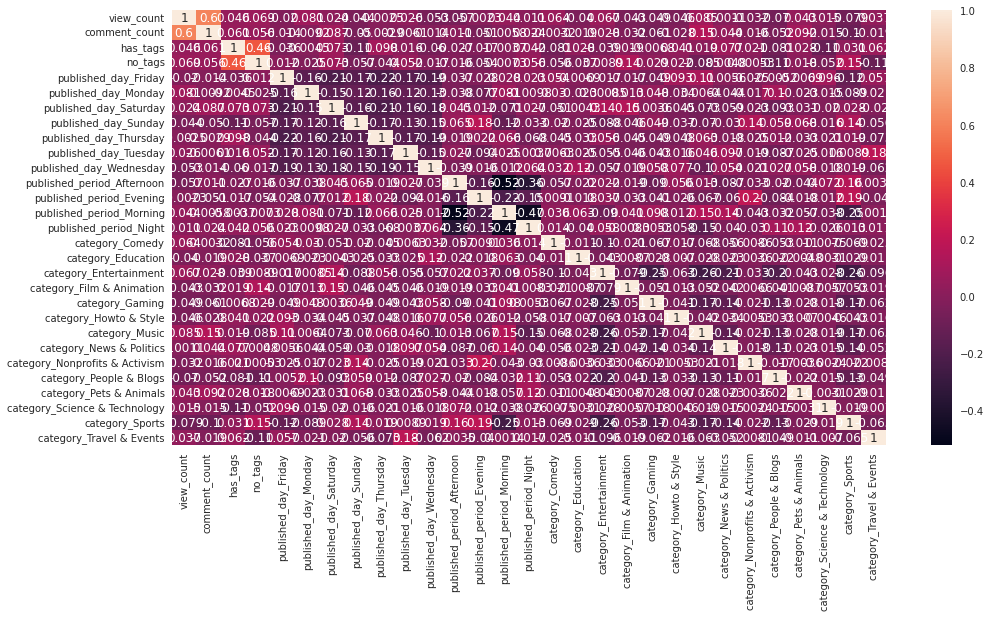

In [443]:
plt.figure(figsize=(16,8))
sns.heatmap(X_train_lr.corr(), annot=True)

## Logistic Regression Model

In [444]:
lr = LogisticRegression()
lr.fit(X_train_lr, y_train)

LogisticRegression()

In [445]:
y_pred=lr.predict(X_test_lr)
y_pred

array([1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,

## Evaluation

Our model did fine with overall accuracy of 67% on test. Our model is pretty generalized due to minimal difference in train and test accuracy. While the model suffers from giving high false negative for zeros, it's suitable for the scenario since it's better to give false late trending prediction than false early prediction for content creators

Classification Report: 
               precision    recall  f1-score   support

       Early       0.55      0.31      0.40       129
        Late       0.70      0.86      0.77       238

    accuracy                           0.67       367
   macro avg       0.62      0.59      0.58       367
weighted avg       0.64      0.67      0.64       367
 

Accuracy on train:   0.679 

Accuracy on test:  0.668 



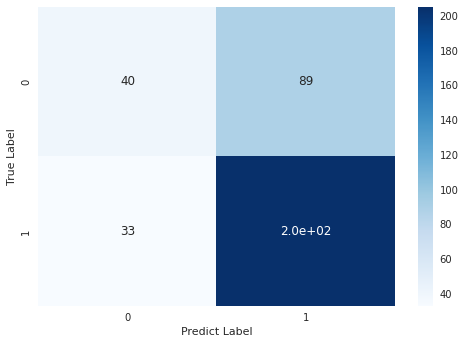

In [446]:
from sklearn import metrics
print("Classification Report: \n", metrics.classification_report(y_test,y_pred, target_names=["Early","Late"]),'\n')
print("Accuracy on train:  ",lr.score(X_train_lr,y_train).round(3),'\n')
print("Accuracy on test: ",lr.score(X_test_lr,y_test).round(3),'\n')
cf=metrics.confusion_matrix(y_test,y_pred).round(3)
sns.heatmap(cf,annot=True,cmap='Blues')
plt.ylabel("True Label")
plt.xlabel("Predict Label")
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


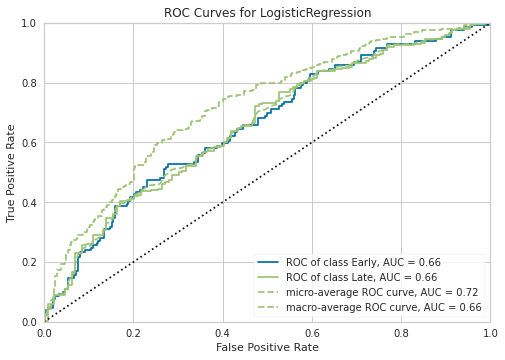

In [447]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(lr, classes=["Early","Late"])
visualizer.fit(X_train_lr, y_train)                   
visualizer.score(X_test_lr, y_test.astype(int))        
visualizer.show()   

Some major factors that influence trending type are as follows

Early Trending | Late Trending
--- | ---
High comment count | High view count
News & Politics | 
Published on Saturday | 






In [448]:
coeffs = pd.Series(lr.coef_[0], index=X.columns).sort_values(ascending=False)
coeffs

view_count                        3.334399
category_Science & Technology     0.571506
category_Education                0.528850
published_day_Sunday              0.413109
no_tags                           0.386032
published_period_Afternoon        0.368773
published_day_Wednesday           0.361733
published_day_Tuesday             0.169389
category_Howto & Style            0.160238
category_Comedy                   0.145039
published_period_Morning          0.125608
category_Film & Animation         0.117638
category_Nonprofits & Activism    0.117186
category_Pets & Animals           0.116876
has_tags                          0.069066
category_Music                    0.057158
published_day_Thursday            0.046330
published_day_Monday             -0.017212
category_Gaming                  -0.062637
category_People & Blogs          -0.087833
published_period_Evening         -0.088727
category_Travel & Events         -0.141563
category_Entertainment           -0.146484
published_d